In [1]:
import pandas as pd
import os
import glob

### Task # Merge all 12 month files into one file

In [2]:
path = r'C:\Users\Asad\Desktop\Sales Anaylsis Project\salesdata' # use your path

all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:

    df = pd.read_csv(filename, index_col=None, header=0)

    li.append(df)

frame = pd.concat(li, axis=0)

frame.to_csv('all_data.csv' , index = False)
frame

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0.0,0.0,0.0,0.0,0.0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2.0,2.0,2.0,2.0,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3.0,3.0,3.0,3.0,3.0,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4.0,4.0,4.0,4.0,4.0,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...,...,...,...,...
11681,NaN,NaN,NaN,NaN,NaN,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,NaN,NaN,NaN,NaN,NaN,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,NaN,NaN,NaN,NaN,NaN,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,NaN,NaN,NaN,NaN,NaN,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Read Updated dataframe

In [3]:
# Droping extra Columns and clean the table
all_data = pd.read_csv('all_data.csv')
all_data = all_data.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1',
                         'Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1'],axis=1)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
419385,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
419386,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
419387,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
419388,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Clean Up the data

In [4]:
#Finding NaN rows and deleting
nan_df = all_data[all_data.isna().any(axis=1)]
all_data =  all_data.dropna(how='all')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
419385,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
419386,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
419387,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
419388,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [5]:
all_data=all_data[all_data['Order Date'].str[0:2] != 'Or']


In [8]:
all_data.loc[:,'Quantity Ordered'] = pd.to_numeric(all_data.loc[:,'Quantity Ordered'])
all_data.loc[:,'Price Each'] = pd.to_numeric(all_data.loc[:,'Price Each'])

#### Argument data with additional Columns

In [11]:
all_data.loc[:,'Month'] = all_data.loc[:,'Order Date'].str[0:2]
all_data.loc[:,'Month'] = all_data.loc[:,'Month'].astype('int32')

### Add a city Column

In [12]:
# let use .apply method
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data.loc[:,'City'] = all_data.loc[:,'Purchase Address'].apply(lambda x:get_city(x)+ ' '+get_state(x))
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA
...,...,...,...,...,...,...,...,...
419385,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles CA
419386,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco CA
419387,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco CA
419388,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco CA


### adding sales column

In [15]:

all_data.loc[:,'Sales'] = all_data.loc[:,'Quantity Ordered'] * all_data.loc[:,'Price Each']


### Q1 :Best sales in which month?

In [16]:
results_by_month = all_data.groupby('Month').sum()

### Visualiztions of best sales

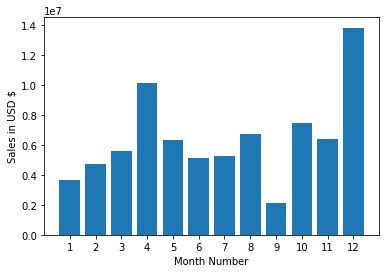

In [17]:
import matplotlib.pyplot as plt 
months = range(1,13)
plt.bar(months,results_by_month['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD $')
plt.xlabel('Month Number')
plt.show()

### Q2:What city had highest number of sales

In [18]:
result_by_city= all_data.groupby('City').sum()

## Visualization of city wise sales 

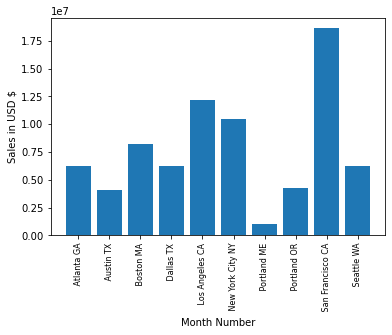

In [19]:
import matplotlib.pyplot as plt 
#cities = all_data['City'].unique()
cities  = [city for city,df in all_data.groupby('City')]
plt.bar(cities,result_by_city['Sales'])
plt.xticks(cities,rotation = 'vertical',size=8)
plt.ylabel('Sales in USD $')
plt.xlabel('Month Number')
plt.show()


### Q3 What time should we display advertisment to maximize likehood of customer's buying product?

In [ ]:
all_data.iloc['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [24]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
hour = [hour for hour,df in all_data.groupby('Hour')]
count = all_data.groupby(['Hour']).count()

### Visualization of Hour sales data 

In [ ]:
plt.plot(hour,count)
plt.xticks(hour)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

### Question 4: What products are most sold togather?

In [ ]:
df = all_data[a]